# Coffee Shop Revenue Analysis by Yashaswani Choudhary 23113171  
## Analysis Strategy
1. Set up the environment  
2. Load the dataset  
3. Data exploration & cleaning  
4. Univariate Analysis  
5. Multivariate Analysis  
6. Statistical Measures  
7. Visualizations (heatmaps, bar plots, scatter plots)  
8. Conclusions  


In [1]:
# setting up the environment 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('ggplot')
sns.set_palette('viridis')


In [2]:
# 2. Loading the dataset from machine 
# kaggle dataset link : https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset
df = pd.read_csv('coffee_shop_revenue.csv')
df.head()


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [3]:
df.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

In [4]:
# data cleaning and exploration
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.info()
df.isnull().sum()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_customers_per_day  2000 non-null   int64  
 1   average_order_value          2000 non-null   float64
 2   operating_hours_per_day      2000 non-null   int64  
 3   number_of_employees          2000 non-null   int64  
 4   marketing_spend_per_day      2000 non-null   float64
 5   location_foot_traffic        2000 non-null   int64  
 6   daily_revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


,number_of_customers_per_day,average_order_value,operating_hours_per_day,number_of_employees,marketing_spend_per_day,location_foot_traffic,daily_revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


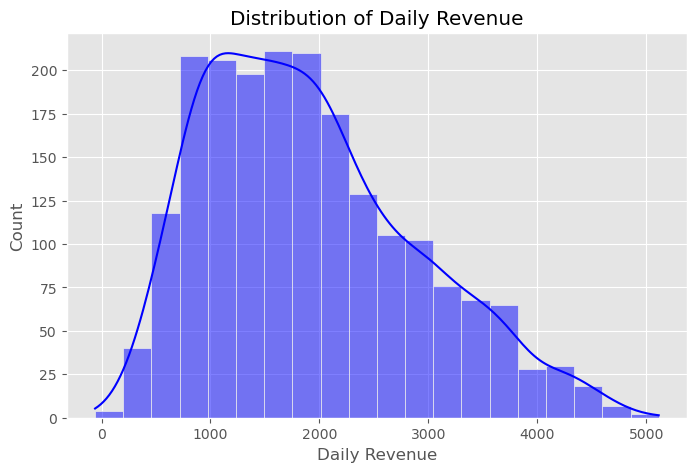

In [5]:
# Univariate Analysis  
# Distribution of Daily Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['daily_revenue'], bins=20, kde=True, color='blue')
plt.title('Distribution of Daily Revenue')
plt.xlabel('Daily Revenue')
plt.show()


C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


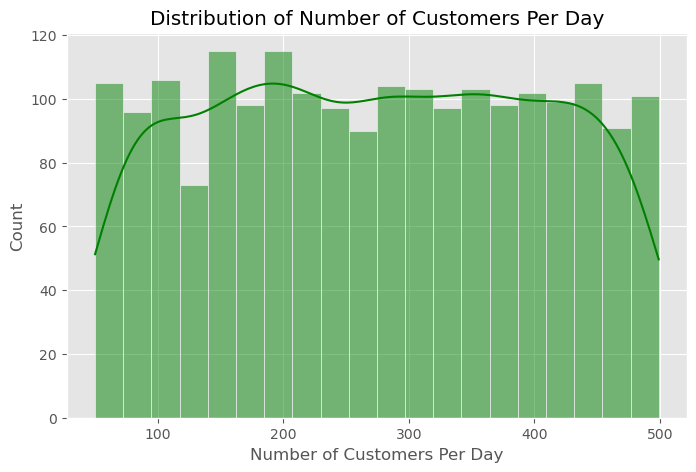

In [6]:
# Distribution of Number of Customers Per Day
plt.figure(figsize=(8, 5))
sns.histplot(df['number_of_customers_per_day'], bins=20, kde=True, color='green')
plt.title('Distribution of Number of Customers Per Day')
plt.xlabel('Number of Customers Per Day')
plt.show()


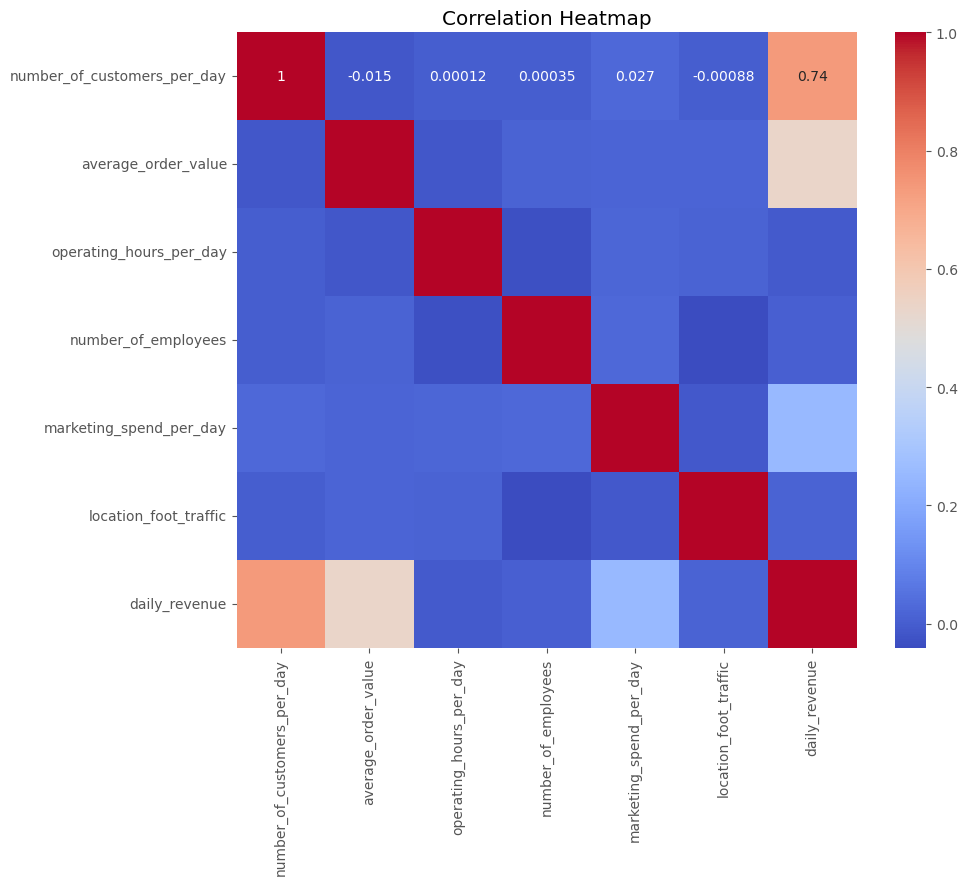

In [7]:
#. Multivariate Analysis  
# Correlation Heatmap
numerical_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


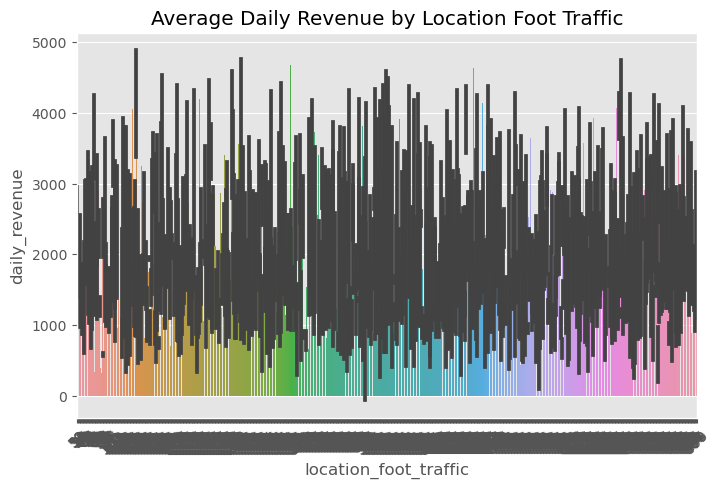

In [8]:
# Average Daily Revenue by Location Foot Traffic
plt.figure(figsize=(8, 5))
sns.barplot(x='location_foot_traffic', y='daily_revenue', data=df)
plt.title('Average Daily Revenue by Location Foot Traffic')
plt.xticks(rotation=45)
plt.show()


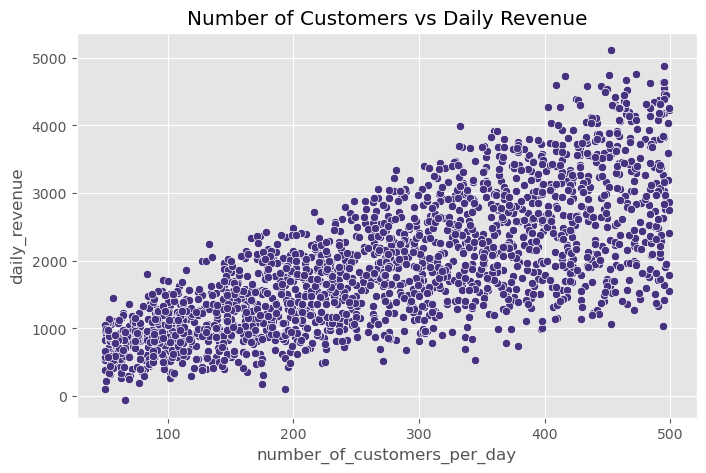

In [9]:
# Number of Customers vs Daily Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='number_of_customers_per_day', y='daily_revenue', data=df)
plt.title('Number of Customers vs Daily Revenue')
plt.show()


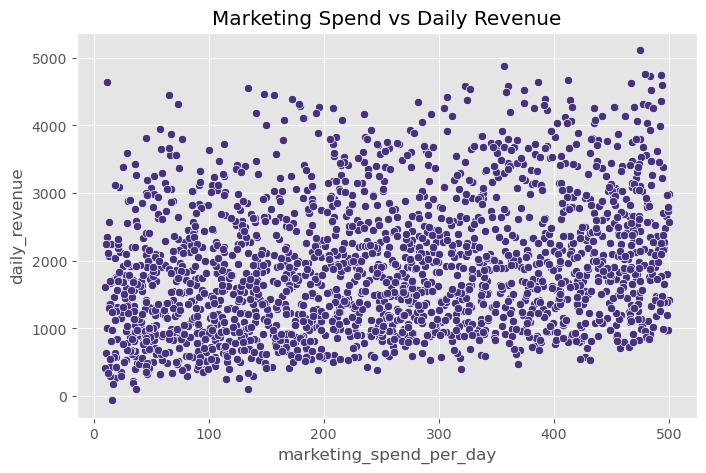

In [10]:
# Marketing Spend vs Daily Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='marketing_spend_per_day', y='daily_revenue', data=df)
plt.title('Marketing Spend vs Daily Revenue')
plt.show()


In [11]:
# calculating Statistical Measures  
revenue_mean = df['daily_revenue'].mean()
revenue_median = df['daily_revenue'].median()
revenue_mode = df['daily_revenue'].mode()[0]

print(f"Mean Daily Revenue: {revenue_mean}")
print(f"Median Daily Revenue: {revenue_median}")
print(f"Mode Daily Revenue: {revenue_mode}")


Mean Daily Revenue: 1917.32594
Median Daily Revenue: 1770.775
Mode Daily Revenue: 1237.5


In [12]:
print(df.columns) 
print(df[['location_foot_traffic', 'daily_revenue']].head())      
print(df[['location_foot_traffic', 'daily_revenue']].isna().sum())  
print(df[['location_foot_traffic', 'daily_revenue']].shape)       


Index(['number_of_customers_per_day', 'average_order_value',
       'operating_hours_per_day', 'number_of_employees',
       'marketing_spend_per_day', 'location_foot_traffic', 'daily_revenue'],
      dtype='object')
   location_foot_traffic  daily_revenue
0                     97        1547.81
1                    744        2084.68
2                    636        3118.39
3                    770        2912.20
4                    232        1663.42
location_foot_traffic    0
daily_revenue            0
dtype: int64
(2000, 2)


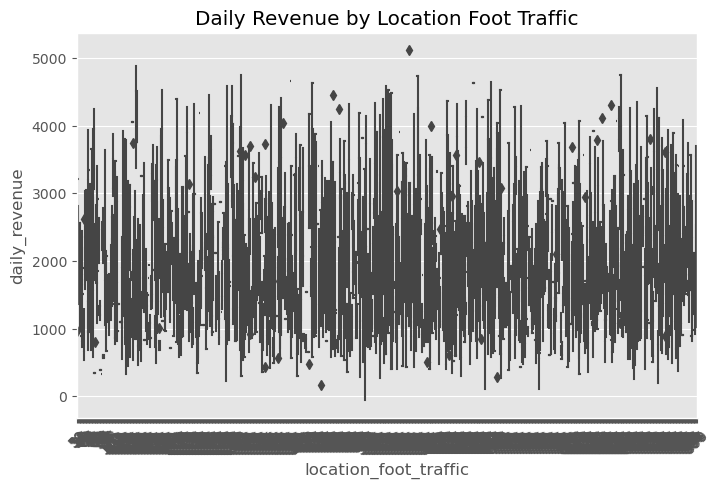

In [13]:
#Daily Revenue by Location Foot Traffic 
plt.figure(figsize=(8, 5))
sns.boxplot(x='location_foot_traffic', y='daily_revenue', data=df)
plt.title('Daily Revenue by Location Foot Traffic')
plt.xticks(rotation=45)
plt.show()

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

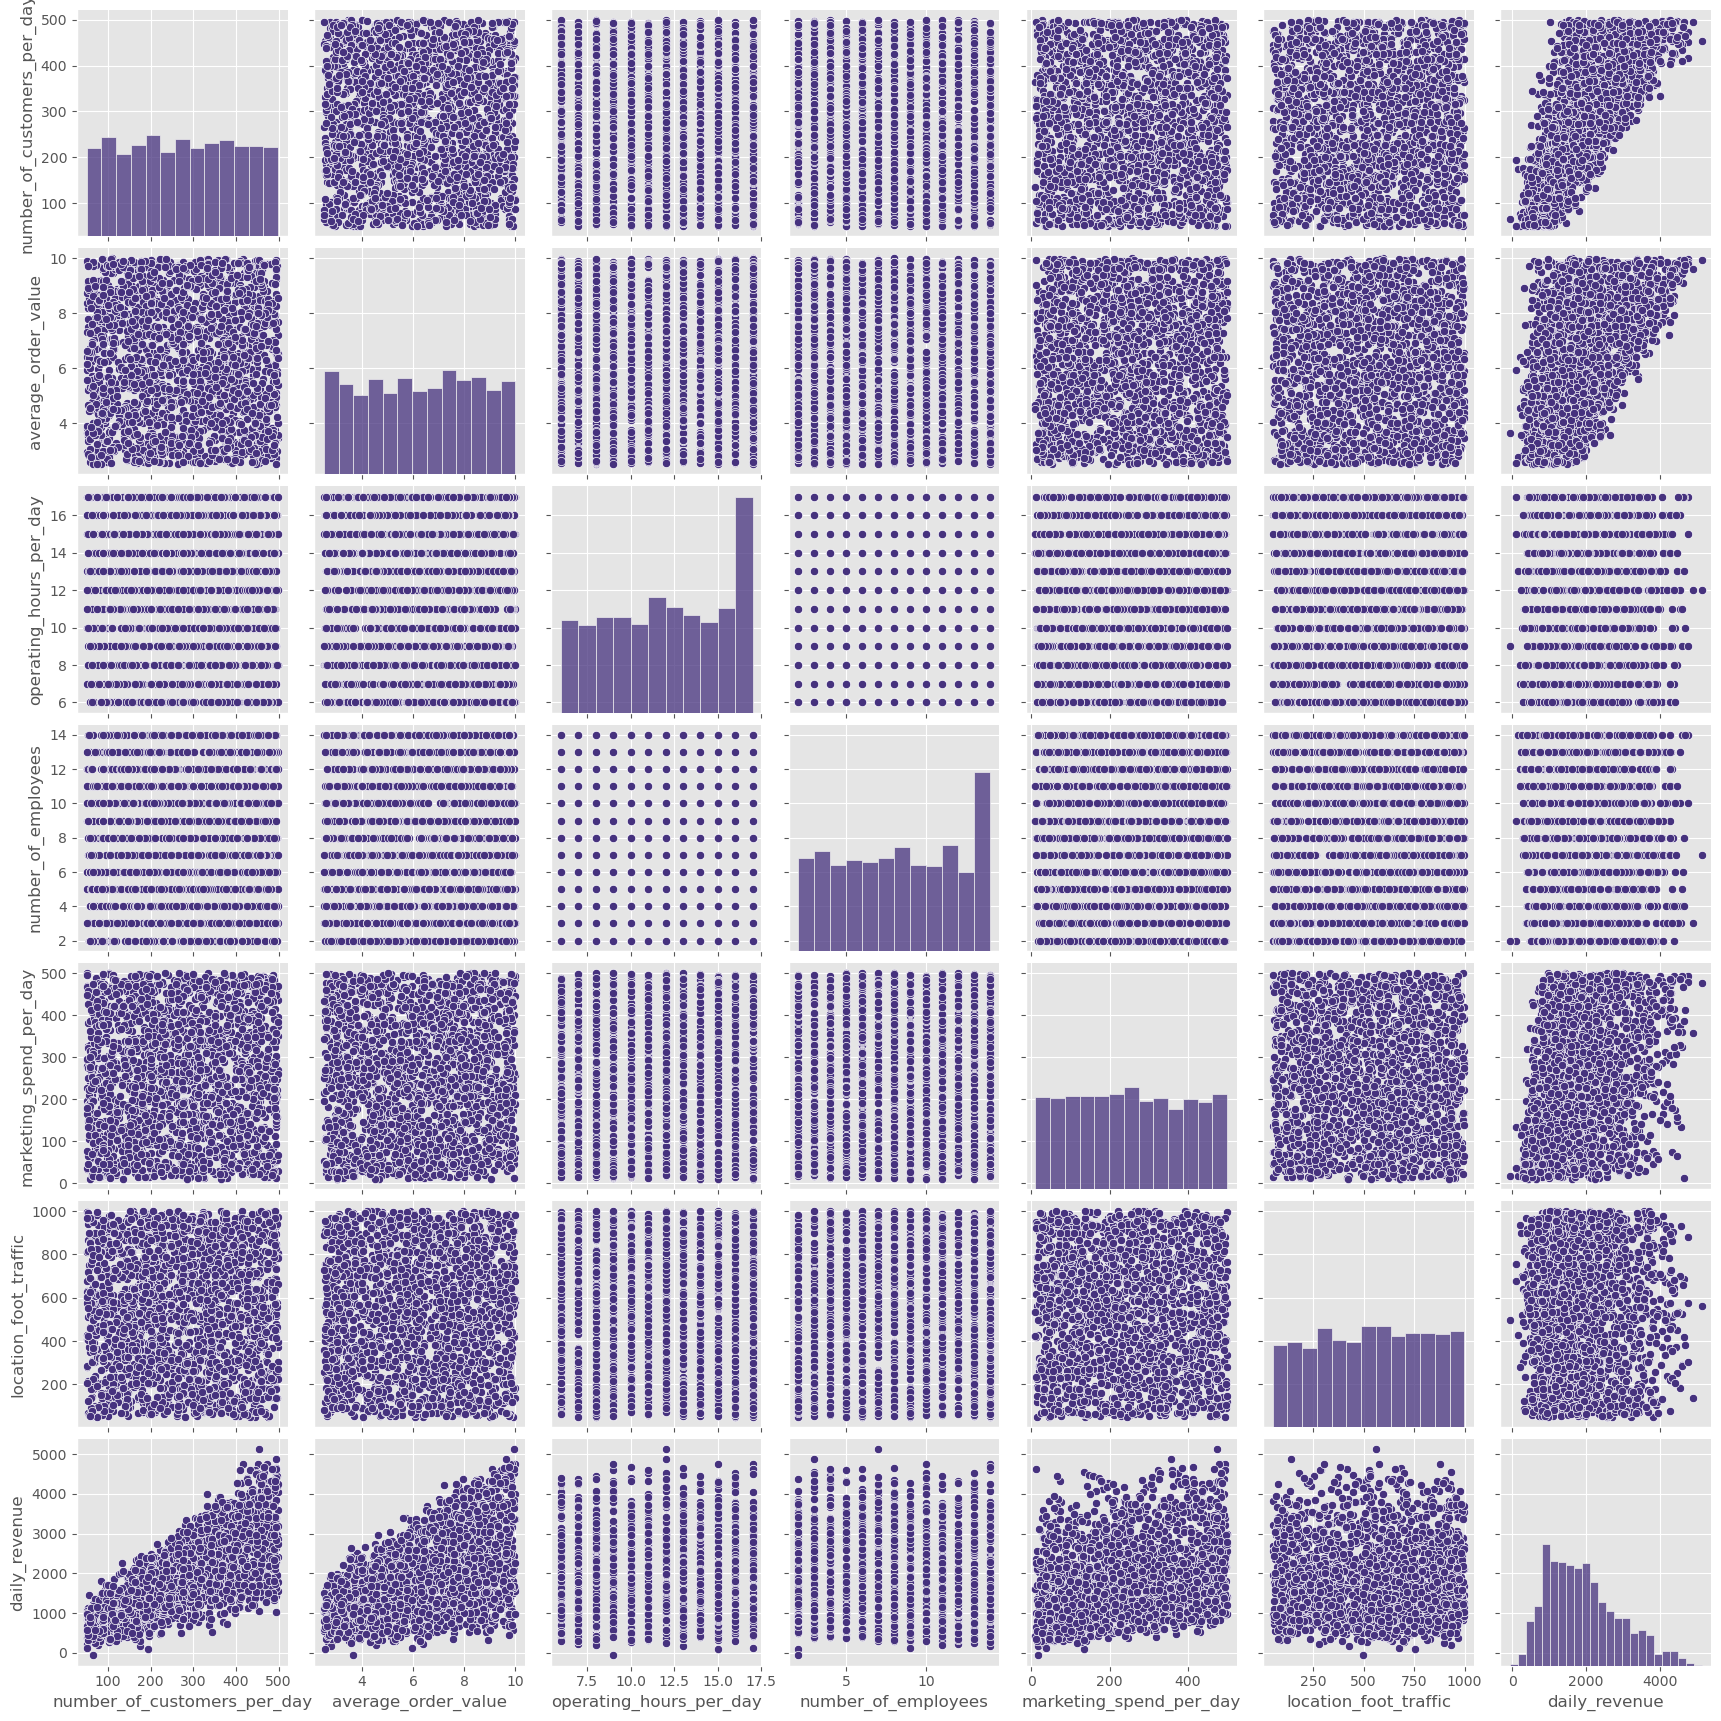

In [14]:
# Pair Plot for Numerical Variables
sns.pairplot(numerical_df)
plt.show()



## 8. Conclusions  
- Inflation rate varies significantly across countries and years.  
- GDP and inflation rate may show an inverse or direct relationship depending on economic conditions.  
- Countries with higher unemployment rates tend to show different economic growth patterns.  
- There are visible patterns between economic indicators like GDP, unemployment, and inflation.  
